## Polynomial Regression

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [47]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

## Training the model on Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression


In [49]:
lin_reg = LinearRegression()


In [50]:
lin_reg.fit(X,y)

LinearRegression()

## Training the model on Polynomial Regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

In [58]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

Polynomial regression is a linear model, and inorder to predict the data using Polynomial regression, 
we need to pass it to LinearRegression()

In [59]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

## Now lets check the linearity of the dataset we have

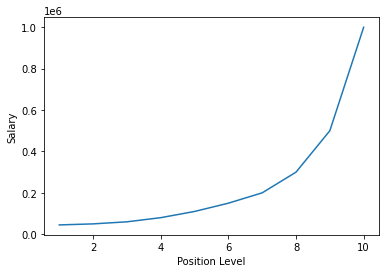

In [33]:
plt.plot(X,y)
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

The line curve we see is not linear, there is a curve, so we are using Polynomial regression, 
the reason of using Polynomial regression is to implement linear model on a non-linear dataset.
But we are also training the model on Linear regression to see the difference in the prediction of the model.


## Visualizing the Linear regression result

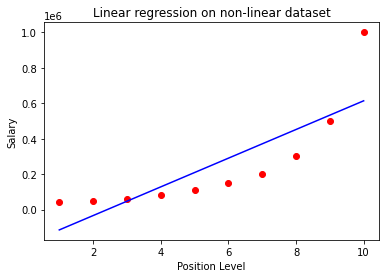

In [63]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title("Linear regression on non-linear dataset")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualizing the Polynomial Regression result

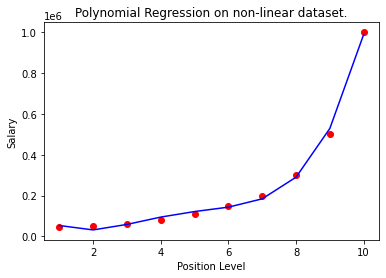

In [65]:
plt.scatter(X,y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title("Polynomial Regression on non-linear dataset.", loc='center')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Predicting the results with both models now:

In [73]:
print(f"As per linear regression, salary for 3.5 position level is: {lin_reg.predict([[3.5]])[0]}")

As per linear regression, salary for 3.5 position level is: 87742.42424242425


In [76]:
print(f"As per Polynomial regression, salary for 3.5 position level is: {lin_reg_2.predict(poly_reg.fit_transform([[3.5]]))[0]}")

As per Polynomial regression, salary for 3.5 position level is: 77125.12747661816


In [77]:
print(f"As per linear regression, salary for 6.5 position level is: {lin_reg.predict([[6.5]])[0]}")

As per linear regression, salary for 6.5 position level is: 330378.78787878784


In [78]:
print(f"As per Polynomial regression, salary for 6.5 position level is: {lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))[0]}")

As per Polynomial regression, salary for 6.5 position level is: 158862.45265154913


**There is a huge difference when a non-linear data is fed to Linear Regression Vs Polynomial Regression, the salary range
is completely different.**